<a href="https://colab.research.google.com/github/adiitya24/ADV_LAB/blob/main/Aditya_Choudhary2021300022_ADV_Exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/List of Orders.csv')
print("Shape of df :",df.shape)
df.head()

Shape of df : (560, 5)


,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [7]:
unique_values_all_columns = df.nunique()
print(unique_values_all_columns)

Order ID        500
Order Date      307
CustomerName    332
State            19
City             24
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [9]:
df.isna().sum()

,0
Order ID,60
Order Date,60
CustomerName,60
State,60
City,60


In [11]:
df = df[['Order ID', 'Order Date','CustomerName','State','City']]
df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [19]:
df.isna().sum()

,0
Order ID,0
Order Date,0
CustomerName,0
State,0
City,0


In [14]:
df = df.dropna()

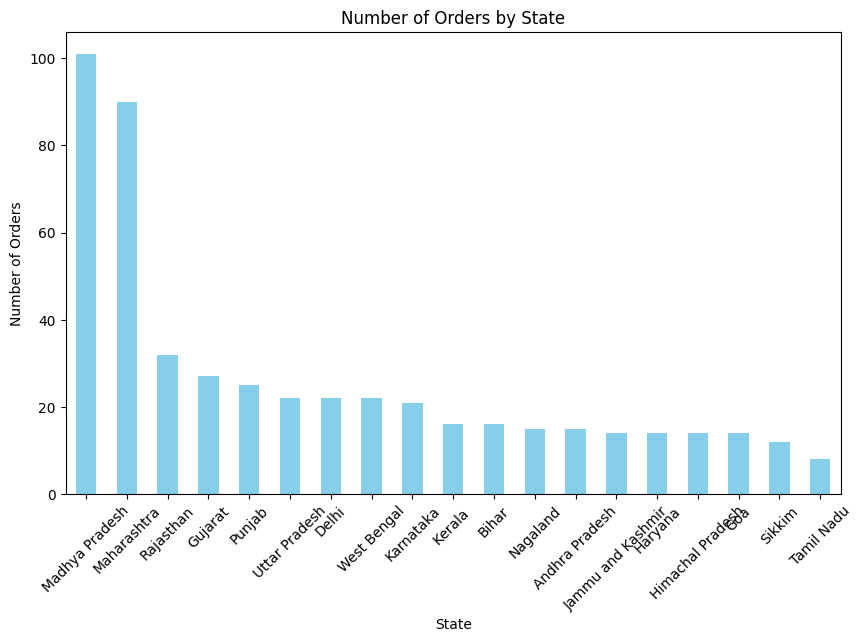

In [21]:
state_orders = df['State'].value_counts()

plt.figure(figsize=(10, 6))
state_orders.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


In [22]:
df.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


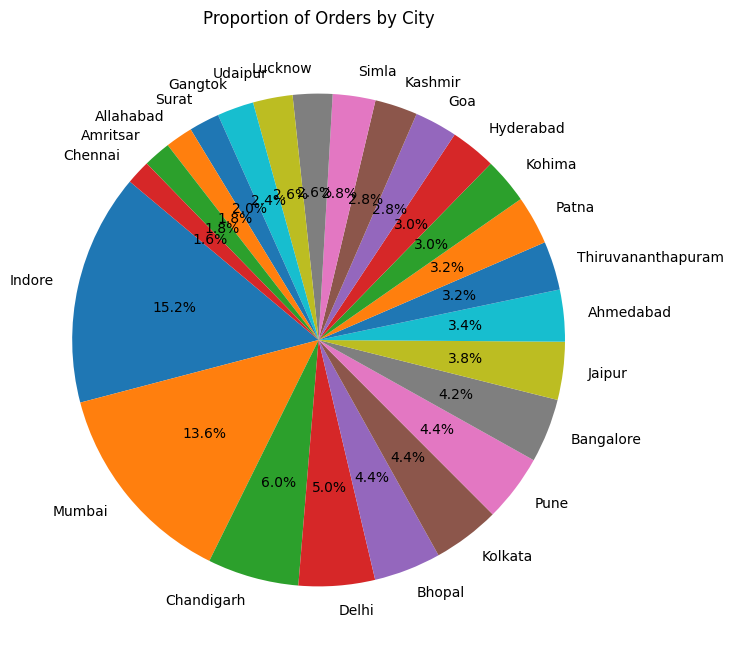

In [23]:
city_orders = df['City'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(city_orders, labels=city_orders.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Orders by City')
plt.show()


**Total Sale for each Category**
The number of sale for kurta and set is al

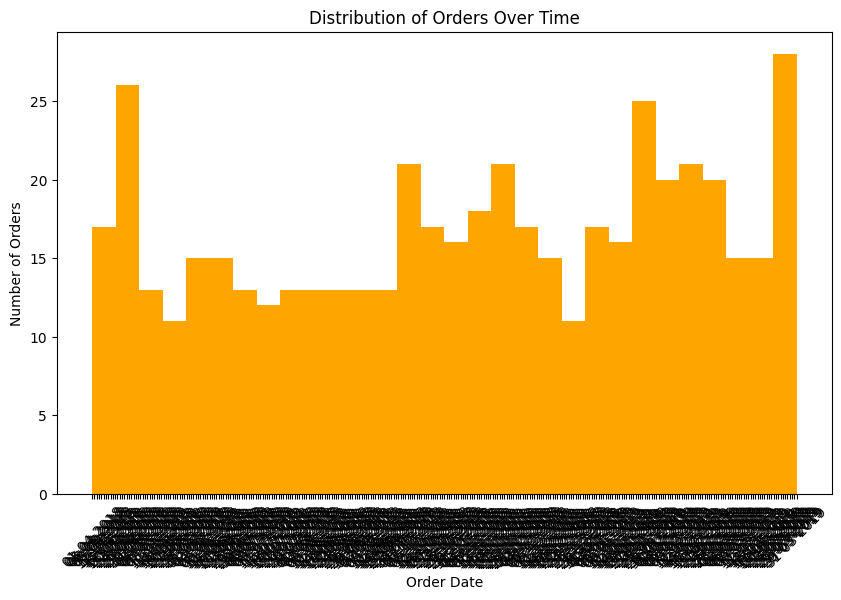

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Order Date'], bins=30, color='orange')
plt.title('Distribution of Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


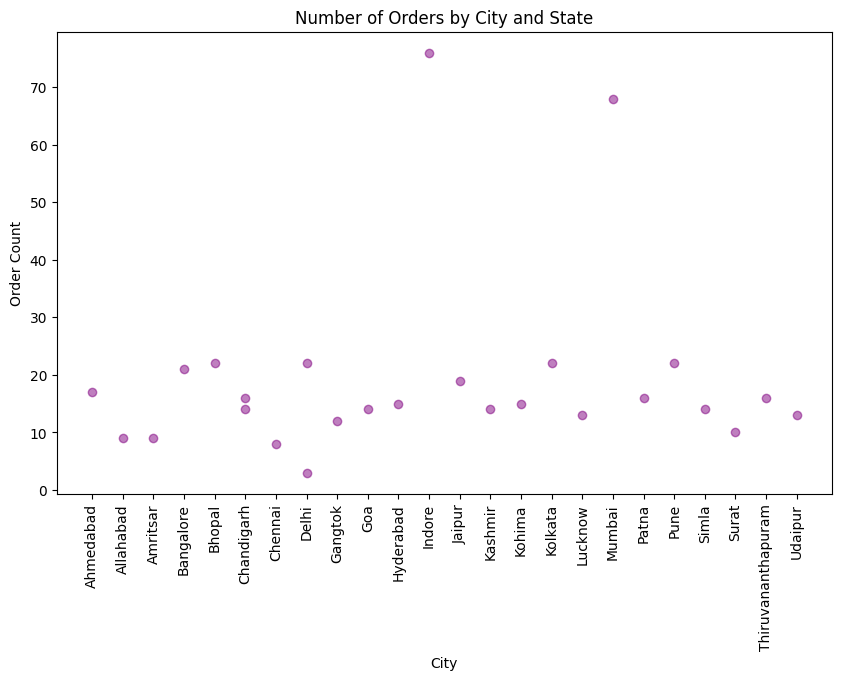

In [28]:
city_state_orders = df.groupby(['City', 'State']).size().reset_index(name='Order Count')

plt.figure(figsize=(10, 6))
plt.scatter(city_state_orders['City'], city_state_orders['Order Count'], alpha=0.5, color='purple')
plt.title('Number of Orders by City and State')
plt.xlabel('City')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()


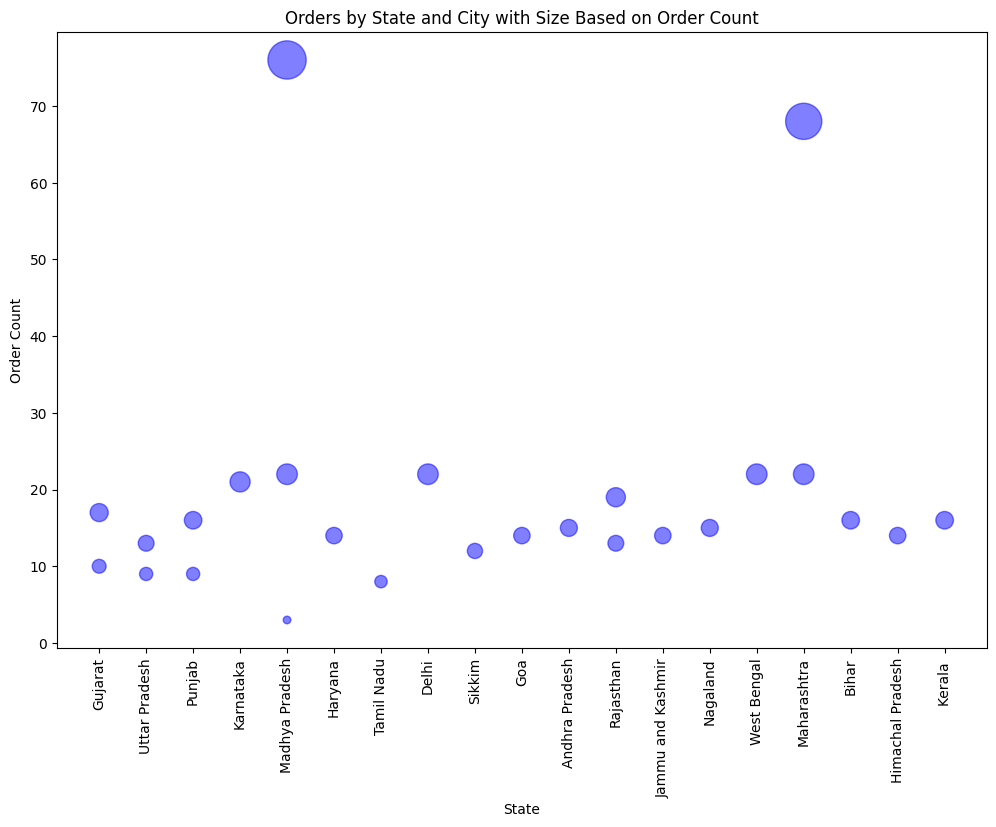

In [29]:
plt.figure(figsize=(12, 8))
plt.scatter(city_state_orders['State'], city_state_orders['Order Count'],
            s=city_state_orders['Order Count']*10, alpha=0.5, color='blue')
plt.title('Orders by State and City with Size Based on Order Count')
plt.xlabel('State')
plt.ylabel('Order Count')
plt.xticks(rotation=90)
plt.show()


In [33]:
# Convert Order Date to datetime, coercing errors to NaT
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows where 'Order Date' is NaT (optional, if you want to remove invalid dates)
df = df.dropna(subset=['Order Date'])

# Check for conversion
print(df['Order Date'].head())


0   2018-01-04
1   2018-01-04
2   2018-03-04
3   2018-03-04
4   2018-05-04
Name: Order Date, dtype: datetime64[ns]


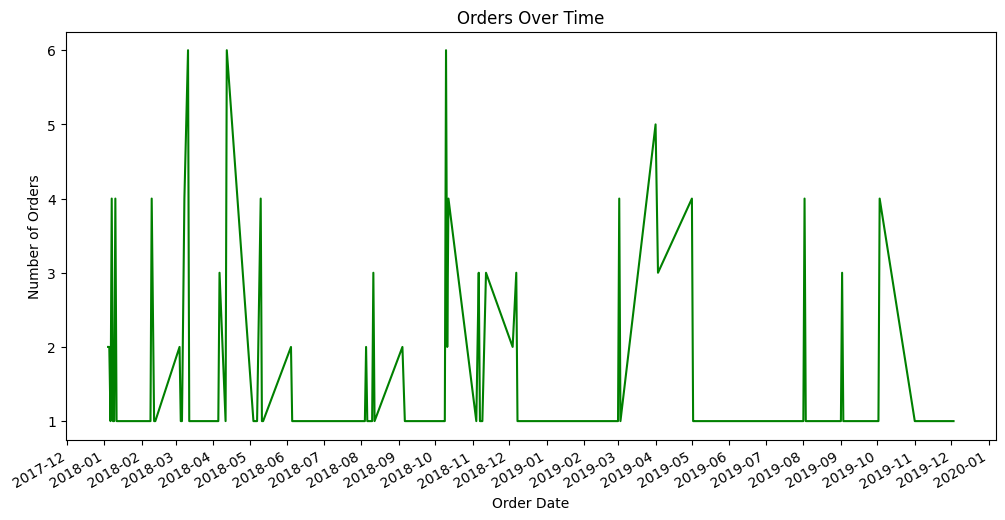

In [36]:
# Group by date and count orders
daily_orders = df.groupby('Order Date').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values, color='green')
plt.title('Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.show()


In [38]:
# Calculate total orders by State
state_sales = df.groupby('State').size().reset_index(name='Order Count')

# Display top states by order count
top_states = state_sales.sort_values(by='Order Count', ascending=False)
print(top_states)


                State  Order Count
10     Madhya Pradesh           41
11        Maharashtra           33
2               Delhi           13
13             Punjab           12
14          Rajasthan           10
4             Gujarat            9
9             Kerala             8
17      Uttar Pradesh            8
1               Bihar            8
12           Nagaland            7
5             Haryana            7
8           Karnataka            7
0      Andhra Pradesh            6
3                 Goa            6
18        West Bengal            5
7   Jammu and Kashmir            4
6    Himachal Pradesh            3
15             Sikkim            3
16         Tamil Nadu            3


In [40]:
# Load dataset (replace 'your_dataset.csv' with the path to your dataset)


# Convert Order Date to datetime, coercing errors to NaT
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows where 'Order Date' is NaT
df = df.dropna(subset=['Order Date'])


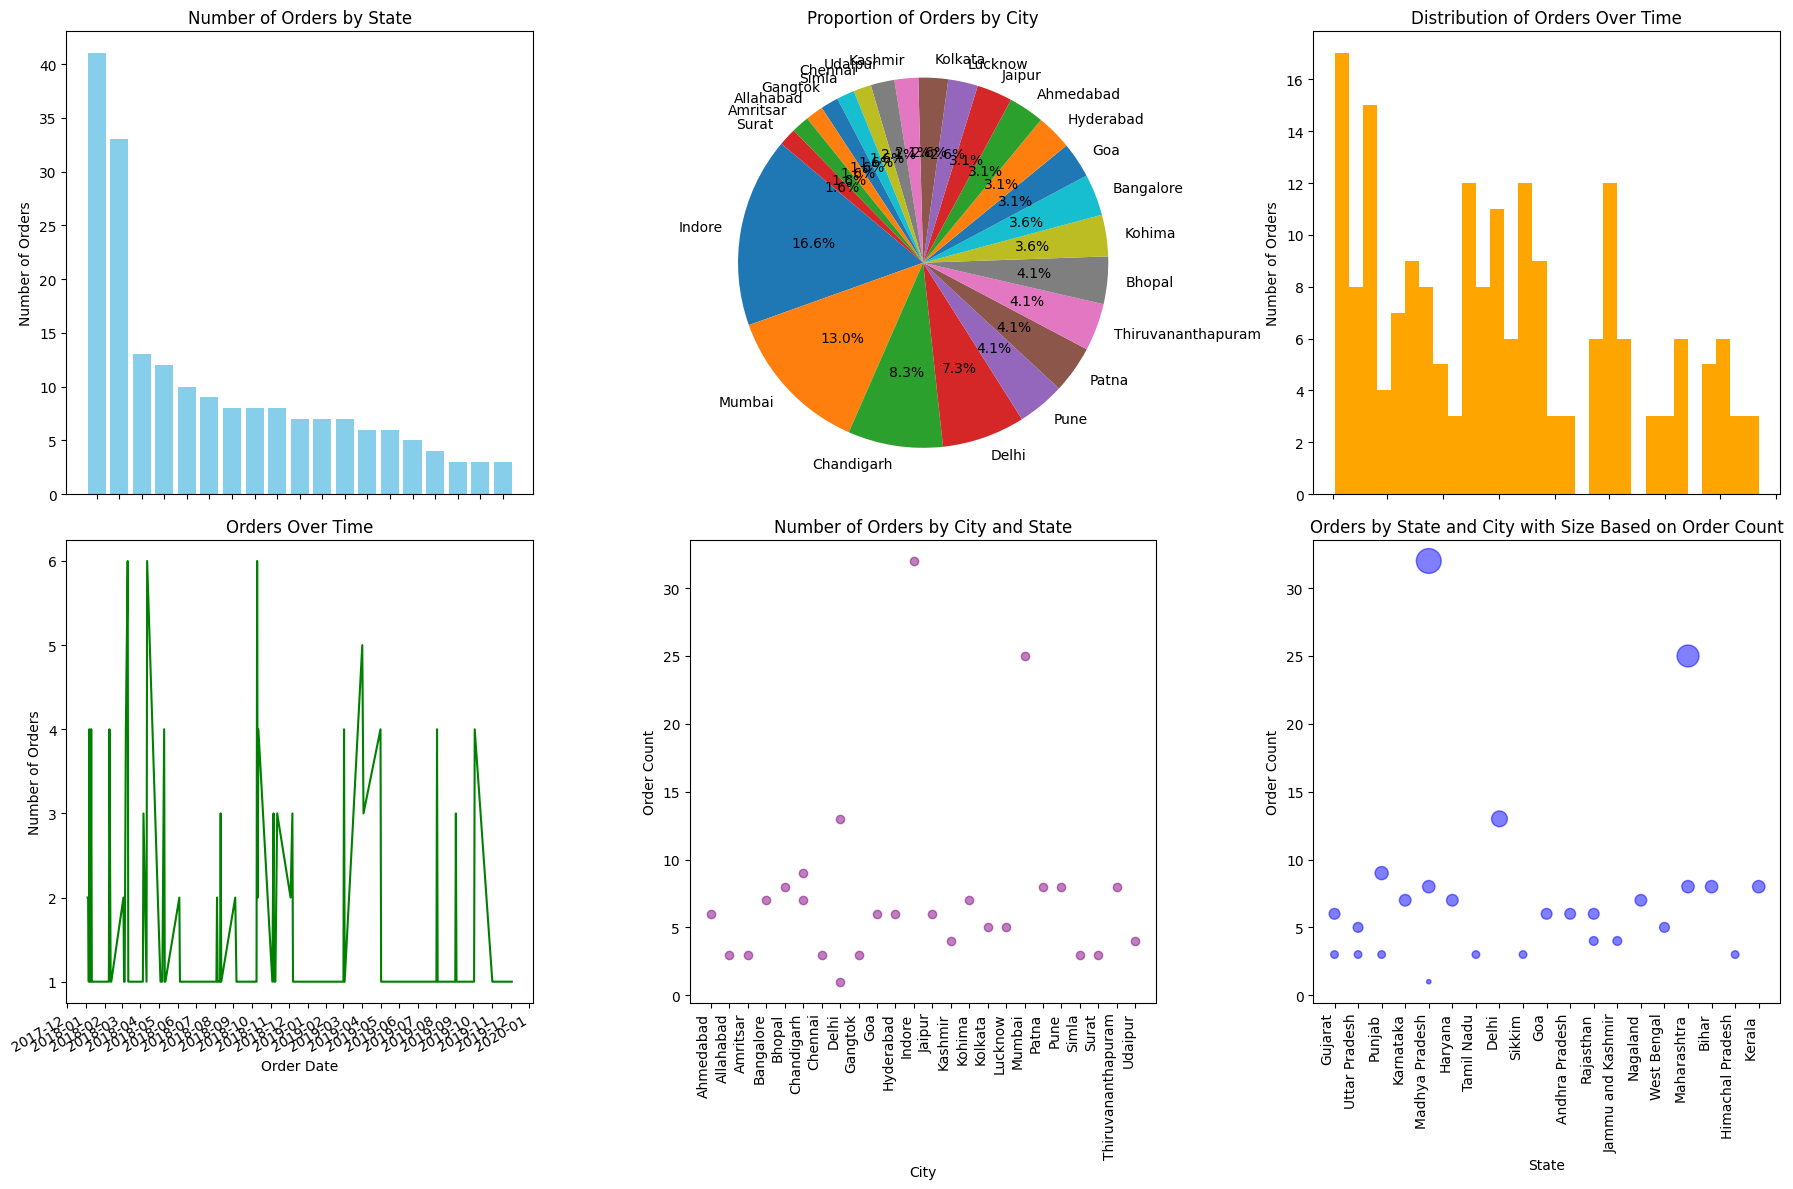

In [41]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Bar Chart: Number of Orders by State
state_orders = df['State'].value_counts()
axs[0, 0].bar(state_orders.index, state_orders.values, color='skyblue')
axs[0, 0].set_title('Number of Orders by State')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Number of Orders')
axs[0, 0].tick_params(axis='x', rotation=45)

# Pie Chart: Proportion of Orders by City
city_orders = df['City'].value_counts()
axs[0, 1].pie(city_orders, labels=city_orders.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Proportion of Orders by City')

# Histogram: Distribution of Orders Over Time
axs[0, 2].hist(df['Order Date'].dt.date, bins=30, color='orange')
axs[0, 2].set_title('Distribution of Orders Over Time')
axs[0, 2].set_xlabel('Order Date')
axs[0, 2].set_ylabel('Number of Orders')
axs[0, 2].tick_params(axis='x', rotation=45)

# Timeline Chart: Orders Over Time
daily_orders = df.groupby('Order Date').size()
axs[1, 0].plot(daily_orders.index, daily_orders.values, color='green')
axs[1, 0].set_title('Orders Over Time')
axs[1, 0].set_xlabel('Order Date')
axs[1, 0].set_ylabel('Number of Orders')
axs[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axs[1, 0].xaxis.set_major_locator(mdates.MonthLocator())
fig.autofmt_xdate()

# Scatter Plot: Number of Orders by City vs. State
city_state_orders = df.groupby(['City', 'State']).size().reset_index(name='Order Count')
axs[1, 1].scatter(city_state_orders['City'], city_state_orders['Order Count'], alpha=0.5, color='purple')
axs[1, 1].set_title('Number of Orders by City and State')
axs[1, 1].set_xlabel('City')
axs[1, 1].set_ylabel('Order Count')
axs[1, 1].tick_params(axis='x', rotation=90)

# Bubble Plot: Orders by State and City with Size Based on Order Count
axs[1, 2].scatter(city_state_orders['State'], city_state_orders['Order Count'],
            s=city_state_orders['Order Count']*10, alpha=0.5, color='blue')
axs[1, 2].set_title('Orders by State and City with Size Based on Order Count')
axs[1, 2].set_xlabel('State')
axs[1, 2].set_ylabel('Order Count')
axs[1, 2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
